In [1]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)
import time
import json
import matplotlib.pyplot as plt

In [2]:
import psi4 
mol_tmpl = """
O
H 1 1
-1 1
"""

# ****R**** is bondlength which is given later as r_angstrom. 
# r_ccsd = np.linspace(0.2, 2.5 * equ_bond_length, 100)
#r_angstrom = np.array([equ_r_ang - 2*delta, equ_r_ang - delta, equ_r_ang, equ_r_ang + delta,equ_r_ang + 2*delta])
# options_dict = {
#     "basis": "cc-pVTZ",
#     "e_convergence": 1e-10,
#     "d_convergence": 1e-10,
# }


# psi4.set_options(options_dict)
mol = psi4.geometry(mol_tmpl)

#ccsdt_e = psi4.energy('ccsd')

# ccsdt_energy_new = []

''' for r_val in r_angstrom:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    mol = psi4.geometry(mol_str)
    ccsdt_e = psi4.energy('ccsd')
    ccsdt_energy_new.append(ccsdt_e) '''


' for r_val in r_angstrom:\n    mol_str = mol_tmpl.replace("**R**", str(r_val))\n    mol = psi4.geometry(mol_str)\n    ccsdt_e = psi4.energy(\'ccsd\')\n    ccsdt_energy_new.append(ccsdt_e) '

In [3]:
# read data from .npy files for formaldehyde casci(8,8) calculations

# !!! Change this to the correct path on your computer!
npy_folder = "/Users/rmandern/code/SCQED-PCQED/OH/"

# these file names should still be good
E_npy_file = npy_folder + "OH_origin_scan_631g_updated_Energies.npy"
Mu_npy_file = npy_folder + "OH_origin_scan_631g_updated_Dipoles.npy"

# store energy eigenvalues in E_array
E_array = np.load(E_npy_file)
# store dipole matrix elements in Mu_array
Mu_array = np.load(Mu_npy_file)


# print(np.shape(E_array))
# print(np.shape(Mu_array))
# print(E_array)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rmandern/code/SCQED-PCQED/OH/OH_origin_scan_631g_updated_Energies.npy'

In [3]:
# setup basic arguments to create an instance of the PFHamiltonianGenerator class
mol_str = """
    O            0.000000000000     0.000000000000     -0.068516219320
    H            0.000000000000    -0.790689573744    0.543701060715
    H            0.000000000000     0.790689573744    0.543701060715
    0 1
    symmetry c1
    no_reorient
    no_com
"""


options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}


cavity_free_dict = {
    'omega_value' : 0.36749303600696764,
    'lambda_vector' : np.array([0, 0, 0.01]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 0, 
}

# create the instance of our PFHamiltonianGenerator class
instance = PFHamiltonianGenerator(mol_str, options_dict, cavity_free_dict)


Start SCF iterations:

Canonical RHF One-electron energy = -121.6767825482576910
CQED-RHF One-electron energy      = -121.6764763272477694
Nuclear repulsion energy          = 8.8014655645634061
Dipole energy                     = 0.0000065684191898
SCF Iteration   1: Energy = -74.9644797826130116   dE = -7.49645E+01   dRMS = 5.97076E-06
SCF Iteration   2: Energy = -74.9644797845251247   dE = -1.91211E-09   dRMS = 2.02758E-06
SCF Iteration   3: Energy = -74.9644797847503526   dE = -2.25228E-10   dRMS = 7.08594E-07
SCF Iteration   4: Energy = -74.9644797847895461   dE = -3.91935E-11   dRMS = 1.22037E-07
SCF Iteration   5: Energy = -74.9644797847905977   dE = -1.05160E-12   dRMS = 1.31335E-09
SCF Iteration   6: Energy = -74.9644797847906261   dE = -2.84217E-14   dRMS = 7.78960E-14
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -74.96447978 hartree
Psi4  SCF energy: -74.96466254 hartree
 Completed QED-RHF in 0.39823484420776367 seconds
 Completed 1HSO Build in 8.29696655

In [11]:
N_R = 21
d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 2
N_ph = 4
omega = 0.12086
lambda_vector = np.array([0, 0, 0.01])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_22 = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr])      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_22[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1

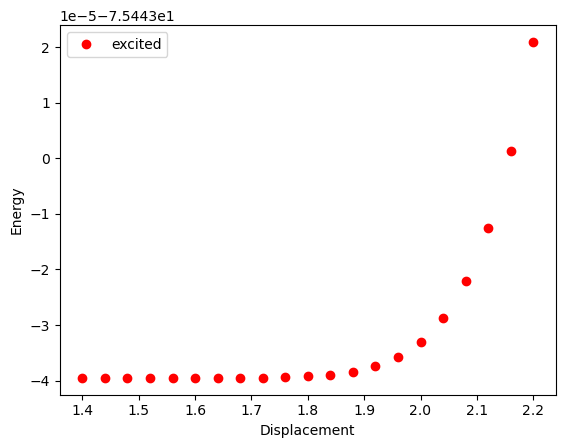

In [12]:
# plt.plot(d_array, _pcqed_cs_22[:,0],'ro-', label="ground-state_cs")
# plt.plot(d_array,_pcqed_22[:,0], label='ground-state')
# plt.plot(d_array,_pcqed_cs_22[:,1], 'bo-', label='excited_cs')
plt.plot(d_array,_pcqed_22[:,0], 'ro' , label='excited')

# plt.plot(lambda_val[:,2],_pcqed_502[:,2],'ro-', label='2nd')
# plt.plot(lambda_val[:,2],_pcqed_502[:,3],'b', label='3rd')
# plt.plot(lambda_val[:,2],_pcqed_502[:,4],'y', label='4th')

plt.xlabel('Displacement')
plt.ylabel('Energy')
# plt.ylim(-113.556, -113.50)
# plt.grid()
plt.legend()
